<a href="https://colab.research.google.com/github/williammcintosh/Portfolio/blob/master/CS520/week02/DataAggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [ ]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

# Data Gathering using Beautiful Soup

## Creating a Beautifuil Soup Object

hubertiming.com is a husband/wife team in Bend, OR who provide timing and race result services to race organizers throughout the USA. They provide timing information for dozens of races each year.

After you get the HTML page create a Beautiful Soup object from the html. This is done by passing the html to the BeautifulSoup() function. The Beautiful Soup package is used to parse the html, that is, take the raw html text and break it into Python objects. The second argument 'lxml' is the html parser, one of several such parsers available for use.

In [ ]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

The soup object allows you to extract interesting information about the website such as the title of the page as shown below.

In [ ]:
# Get the title
title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


## Getting Website Text

You can also get the text of the webpage and quickly print it out to check if it is what you expect.


In [ ]:
# print(soup.text)

Next, use the find_all() method of soup to extract useful html tags within a webpage. Examples of useful tags include < a > for hyperlinks, < table > for tables, < tr > for table rows, < th > for table headers, and < td > for table cells. The code below shows how to extract all the hyperlinks within the webpage.

In [ ]:
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img

As you can see from the output above, html tags sometimes come with attributes such as class, src, etc. These attributes provide additional information about html elements. You can use a for loop and the get('"href") method to extract and print out only hyperlinks.

In [ ]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


To print out table rows only, pass the 'tr' argument in soup.find_all().


In [ ]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
# print(rows[:10])

One goal of this lab is to learn how to convert such table data to a Python Pandas dataframe for easier transformation and analysis. You should get all of the table’s rows in list form first and then convert that list into a pandas dataframe. Below is a for loop that iterates through table rows and prints out the cells of the rows. Again, BeautifulSoup helps you to process/access the data in ways that make sense for an HTML document with a call to find_all(‘td’). “td” is the tag used to delimit table cells.

In [ ]:

for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

The output above shows that each row is printed with html tags embedded in each row. This is not what you want. You can remove the html tags using Beautiful Soup or regular expressions.

To remove html tags using Beautiful Soup, pass the string of interest into BeautifulSoup() and use the get_text() method to extract the text without html tags.


In [ ]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


## Regular Expressions

To gain a better understanding of the problem, try doing the same extraction with regular expressions. Be sure to import the re (regular expressions) module in your python environment. The code below shows how to build a regular expression that finds all the characters inside the < td > html tags and replace them with an empty string for each table row.

First, the code compiles a regular expression by passing the regex to re.compile(). Compilation is not required, but many python programming resources recommend compilation of regex to improve performance. This is especially the case if the same regex is to be used over many lines of input text.

The '<.*?>' regex will match an opening angle bracket followed by anything and followed by a closing angle bracket. The ‘?’ character causes the regex to match text in a non-greedy fashion, that is, it matches the shortest possible string. If you omit the question mark, it will match all the text between the first opening angle bracket and the last closing angle bracket which would lead to confusing results.

After compiling the regex, use the re.sub() method to find all the substrings where the regular expression matches and replace each with an empty string. The full code below generates an empty list, extracts text between html tags for each row, and appends it to the assigned list.


In [ ]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)


[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


str

Using regex works well for this task, but I also hope that you can see what an advantage BeautifulSoup gives you for the specific job of parsing html documents! 

The next step is to convert the list into a pandas dataframe and get a quick view of the first 10 rows of data. Pandas is a wonderful tool for manipulating python data as tables. It’s almost like having a database server or google sheets within your python environment. We will use a couple of features in this lab (and throughout the DataEng course), but I encourage you to explore it much further, see the pandas wikipedia page for a start.


## Creating a Pandas Dataframe

In [ ]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


# Data Transformation

Our topic this week is “Data Gathering”, and in a sense, you are done with the gathering. But to make things interesting you should continue on and use the data that you gathered. Next we need to transform the data into something more meaningful.

The dataframe is not in the format we want. To clean it up, split the "0" column into multiple columns at the comma position. Use the str.split() method.


In [ ]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


This looks much better, but there is still work to do. The dataframe has unwanted square brackets surrounding each row. Use the strip() method to remove the opening square bracket on column "0."

In [ ]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


Note that column 13 also has some ugly ‘]’ characters. We could strip these as well, but for demonstration purposes we will do that later when we show how pandas lets us refer to that column in a symbolic way instead of using the mysterious number 13.

The table is missing table headers. So go back to BeautifulSoup and use its find_all() method to get the table headers.


In [ ]:
col_labels = soup.find_all('th')

Similar to table rows, you can use Beautiful Soup to extract text in between html tags for table headers.

In [ ]:

all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)


['[Place, Bib, Name, Gender, City, State, Time, Gun Time, Team]']


Next convert the table headers to a new pandas dataframe.

In [ ]:

df2 = pd.DataFrame(all_header)
df2.head()


,0
0,"[Place, Bib, Name, Gender, City, State, Time, ..."


In [ ]:


df3 = df2[0].str.split(',', expand=True)
df3.head()


,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]


Next, concatenate the two dataframes into one using the concat() method.


In [ ]:

frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]


Next, re-configure the data frame so that the first row is the table header.


In [ ]:

df5 = df4.rename(columns=df4.iloc[0])
df5.head()


,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None


Behold all of the progress that you have made! At this point, the table is almost properly formatted. For analysis, start by getting an overview of the data as shown below.


In [ ]:
print(df5.shape)
df5.info()

(583, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     583 non-null    object
 1    Bib       581 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


In [ ]:
df5.head()

,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None


The table has 597 rows and 14 columns. One statement that you will hear me say over and over throughout the course is, “if you did not validate the data then it’s probably wrong”, and this data is no exception. How do we know? Because it has 597 rows, but the various columns have varying numbers of “non-null object” values. So transform it again to drop all rows with any missing values.

In [ ]:

df6 = df5.dropna(axis=0, how='any')
df6.info()
df6.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     578 non-null    object
 1    Bib       578 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.2+ KB


(578, 9)

Wasn’t that easy? When I say “pandas is useful”, this is one example of what I mean. You can do the same type of thing within a relational database, but by keeping all of the data in memory within our python program we can accomplish this type of transformation task much more quickly and cleanly.

In a real data engineering project probably we would validate the data thoroughly by devising predicates for every aspect of the data. But to keep the focus on data gathering we will instead move forward with the data we have.

Notice how the table header is replicated as the first row in df5 and df6. Drop this redundant row like this:


In [ ]:

df7 = df6.drop(df6.index[0])
df7.head()


,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


Clean up the headers a bit more by renaming the '[Place' and ' Team]' columns. Python is picky about whitespace. Make sure you include a space after the quotation mark in ' Team]'.

In [ ]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()


,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


The final data cleaning step involves removing the closing bracket for cells in the "Team" column.

In [ ]:

df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


## Clean Up Unwanted Characters

In [ ]:

df7 = df7.replace(to_replace=[r"\\r", r"\\n", "\s+"], value=["", "", ""], regex=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,JAREDWILSON,M,TIGARD,OR,36:21,36:24,
6,2,573,NATHANASUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTELTEAMF
7,3,687,FRANCISCOMAYA,M,PORTLAND,OR,37:44,37:48,
8,4,623,PAULMORROW,M,BEAVERTON,OR,38:34,38:37,
9,5,569,DEREKGOSBORNE,M,HILLSBORO,OR,39:21,39:24,INTELTEAMF


The dataframe is now  in the desired format. One thing you could do at this point is to further transform the data by eliminating redundancies and unneeded information. For example, some of the columns appear to be redundant and potentially could be dropped.

Next move on to the Data Science part, including computation of summary statistics and plotting of results.


# Data Analysis and Visualization


The first question to answer is, what was the average finish time (in minutes) for the runners? Unfortunately, the “Chip Time” field gives the finish time in hh:mm:ss , so you need to transform that column into just minutes. One way to do this is to convert the column to a list first for manipulation.

Seems like the name of the column was updated to ` Gun Time`.

In [ ]:
df7.columns

Index(['Place', ' Bib', ' Name', ' Gender', ' City', ' State', ' Time',
       ' Gun Time', 'Team'],
      dtype='object')

In [ ]:

time_list = df7[' Gun Time'].tolist()

In [ ]:

# You can use a for loop to convert 'Chip Time' to minutes
padded_times = []
for time in time_list:
    time_parts = time.split(':')
    if len(time_parts) == 2:
        # Add leading zero to the hours section
        time_parts.insert(0, '00')
    # Pad minutes and seconds with leading zeros
    time_parts[1:] = [part.zfill(2) for part in time_parts[1:]]
    padded_time = ':'.join(time_parts)
    padded_times.append(padded_time)

print(padded_times)

['00:36:24', '00:36:45', '00:37:48', '00:38:37', '00:39:24', '00:39:55', '00:40:17', '00:40:09', '00:40:24', '00:40:25', '00:40:40', '00:40:42', '00:40:50', '00:41:13', '00:41:24', '00:41:49', '00:42:02', '00:42:28', '00:42:34', '00:42:48', '00:42:52', '00:42:58', '00:43:04', '00:43:36', '00:43:30', '00:43:43', '00:44:01', '00:43:52', '00:43:51', '00:43:53', '00:43:52', '00:43:52', '00:44:10', '00:44:12', '00:44:18', '00:44:17', '00:44:29', '00:45:09', '00:45:10', '00:44:46', '00:45:01', '00:45:46', '00:45:09', '00:45:22', '00:45:30', '00:45:18', '00:45:35', '00:45:32', '00:45:26', '00:45:24', '00:45:53', '00:45:34', '00:45:42', '00:46:31', '00:46:17', '00:45:59', '00:46:02', '00:45:57', '00:46:05', '00:46:07', '00:46:16', '00:46:39', '00:46:28', '00:46:33', '00:46:58', '00:48:01', '00:47:02', '00:46:53', '00:46:57', '00:47:06', '00:47:00', '00:47:49', '00:46:56', '00:47:09', '00:48:54', '00:47:32', '00:47:21', '00:47:10', '00:47:37', '00:47:13', '00:47:41', '00:47:30', '00:48:28', '00

In [ ]:


# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in padded_times:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
print(time_mins)

[36.4, 36.75, 37.8, 38.61666666666667, 39.4, 39.916666666666664, 40.28333333333333, 40.15, 40.4, 40.416666666666664, 40.666666666666664, 40.7, 40.833333333333336, 41.21666666666667, 41.4, 41.81666666666667, 42.03333333333333, 42.46666666666667, 42.56666666666667, 42.8, 42.86666666666667, 42.96666666666667, 43.06666666666667, 43.6, 43.5, 43.71666666666667, 44.016666666666666, 43.86666666666667, 43.85, 43.88333333333333, 43.86666666666667, 43.86666666666667, 44.166666666666664, 44.2, 44.3, 44.28333333333333, 44.483333333333334, 45.15, 45.166666666666664, 44.766666666666666, 45.016666666666666, 45.766666666666666, 45.15, 45.36666666666667, 45.5, 45.3, 45.583333333333336, 45.53333333333333, 45.43333333333333, 45.4, 45.88333333333333, 45.56666666666667, 45.7, 46.516666666666666, 46.28333333333333, 45.983333333333334, 46.03333333333333, 45.95, 46.083333333333336, 46.11666666666667, 46.266666666666666, 46.65, 46.46666666666667, 46.55, 46.96666666666667, 48.016666666666666, 47.03333333333333, 

Next, convert the list back into a dataframe and create a new column ("Runner_mins") for runner chip times expressed in just minutes. 

In [ ]:


df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team,Runner_mins
5,1,814,JAREDWILSON,M,TIGARD,OR,36:21,36:24,,36.400000
6,2,573,NATHANASUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTELTEAMF,36.750000
7,3,687,FRANCISCOMAYA,M,PORTLAND,OR,37:44,37:48,,37.800000
8,4,623,PAULMORROW,M,BEAVERTON,OR,38:34,38:37,,38.616667
9,5,569,DEREKGOSBORNE,M,HILLSBORO,OR,39:21,39:24,INTELTEAMF,39.400000


Finally, time for analysis! Pandas provides a handy “describe” method that computes a generous list of explanatory statistics for the dataframe.

In [ ]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.631340
std,12.110846
min,36.400000
25%,51.450000
50%,59.900000
75%,68.000000
max,102.166667


Interestingly, the average chip time for all runners was ~60 mins. The fastest 10K runner finished in 36.35 mins, and the slowest runner finished in 101.30 minutes.

Boxplots can help to visualize summary statistics (maximum, minimum, medium, first quartile, third quartile, including outliers) for a given column. Below are data summary statistics for the runners shown in a boxplot. For data visualization, it is convenient to first import parameters from the pylab module that comes with matplotlib and set the same size for all figures to avoid doing it for each figure.


([<matplotlib.axis.XTick at 0x7f4c142cb340>], [Text(1, 0, 'Runners')])

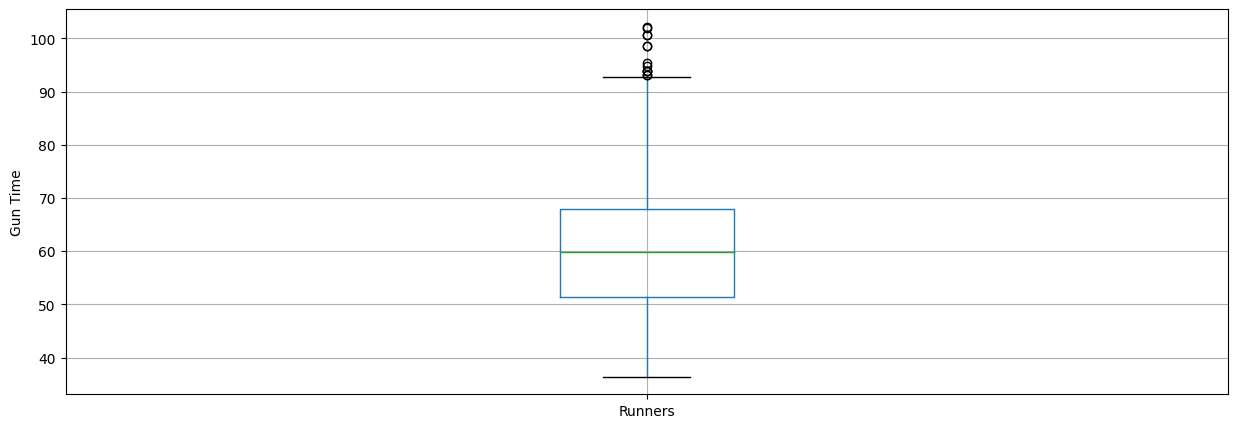

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5


df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Gun Time')
plt.xticks([1], ['Runners'])

## Question 2

The boxplot visualization clearly shows that most runners finished between low 50s and upper 60s (minutes) with a few outliers far up above 90 minutes.

Our second question: Did the runners' finish times follow a normal distribution?
To study the shape of the distribution, plot the runners’ chip times using the seaborn python plotting library. Seaborn provides a wealth of useful, compelling, visualization tools. The distribution looks almost normal. “Looks almost normal” of course is not sufficient, and at this point a good statistician would use various tests and methods to properly classify this distribution.

One thing to note here is the large number of outliers on the high end of the race times. If we ignored those, then the normal distribution might be an even better model of the data. But if we include those outliers, then we might favor a more sophisticated distribution to model the data properly.


<ipython-input-51-69d9daa153b8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})


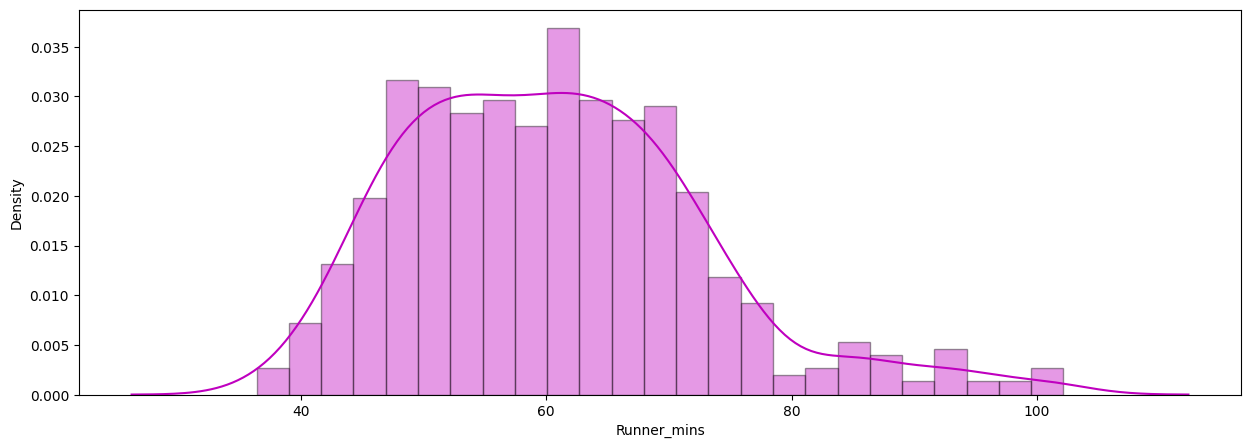

In [ ]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()


## Question 3

Question 3: Were there any performance differences between males and females of various age groups? To explore this question, plot separate distributions of chip times for males and females.

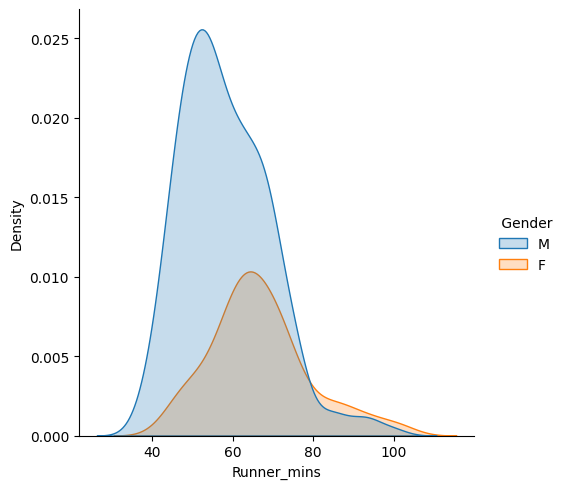

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

f_fuko = df7.loc[df7[' Gender']=='F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']=='M']['Runner_mins']

sns.displot(data=df7, x='Runner_mins', hue=' Gender', kind='kde', fill=True)

plt.show()

The distribution indicates that females were slower than males on average. If you prefer summary, descriptive statistics to the visual plot, then use the pandas groupby() method to compute summary statistics for males and females separately.

In [ ]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)


        Runner_mins                                                      \
              count       mean        std        min        25%     50%   
 Gender                                                                   
F             163.0  66.743252  12.287397  43.866667  59.283333  65.200   
M             414.0  58.224960  11.170953  36.400000  49.787500  56.475   

                                
               75%         max  
 Gender                         
F        72.358333  102.166667  
M        65.429167  100.533333  


The average chip time for all females and males was ~66 mins and ~58 mins, respectively. Next, display a side-by-side boxplot comparison of male and female finish times.

Text(0.5, 0.98, '')

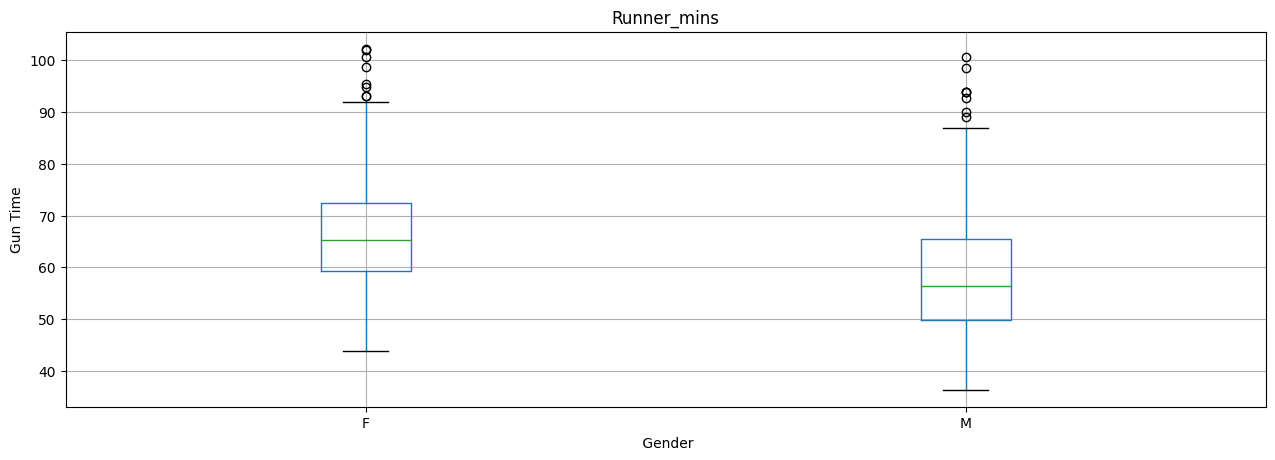

In [ ]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Gun Time')
plt.suptitle("")

Looks like both males and females had significant numbers of outliers in the > 90m range. 

One question a Data Engineer should always ask is whether some of the data is somehow artificial, incorrect or invalid. For example, what happens if a runner drops out of the race? Would the race officials drop them from the data? Or would they give them some sort of artificial, long finish time? Or would they map that time to an agreed “maximum” time? Such decisions can greatly affect automated analysis of the data, and the Data Engineer needs to understand and account for such cases when providing high-quality data.


# Is Your Code Robust?

A good Data Engineer should always develop robust code that works in multiple situations and does not need to be adjusted for each new set of input data. Of course, we generally achieve robustness through testing. So try your code with a new/different road race:

https://www.hubertiming.com/results/2023WyEasterLong

Does your code succeed with this data as well? How do the results compare with the older, 2017 race?


## Trying a New URL

In [ ]:
url = "https://www.hubertiming.com/results/2023WyEasterLong"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')

rows = soup.find_all('tr')
for row in rows:
    row_td = row.find_all('td')
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)

df = pd.DataFrame(list_rows)
df1 = df[0].str.split(',', expand=True)
df1[0] = df1[0].str.strip('[')

col_labels = soup.find_all('th')

all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)

df2 = pd.DataFrame(all_header)

df3 = df2[0].str.split(',', expand=True)

frames = [df3, df1]

df4 = pd.concat(frames)

df5 = df4.rename(columns=df4.iloc[0])
df6 = df5.dropna(axis=0, how='any')
df7 = df6.drop(df6.index[0])
df7 = df7.replace(to_replace=[r"\\r", r"\\n", "\s+"], value=["", "", ""], regex=True)
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7 = df7.drop([' Gender Place', ' Age Group', ' Age Group Place]'], axis=1)
df7.head()

,Place,Bib,Name,Gender,Age,City,State,Time
6,1,345,ZACHVIOLETT,M,40,BEND,OR,1:33:19
7,2,335,KYLEEROOD,O,34,BEND,OR,1:42:56
8,3,323,ZEBEDIAHMILLSLAGL,M,25,BEND,OR,1:52:07
9,4,308,DAVIDGRIFFIN,M,35,SEATTLE,WA,1:53:10
10,5,326,ADAMNILSEN,M,30,PORTLAND,OR,1:54:57


As you can see, the new link didn't quite work. Some of the columns had to be manually dropped through the line

```
df7 = df7.drop([' Gender Place', ' Age Group', ' Age Group Place]'], axis=1)
```

# Conclusion

In this lab activity, you explored data gathering, transformation, validation and analysis  using Python, BeautifulSoup, pandas, matplotlib, Seaborn, etc. You should now have a bit more understanding and appreciation of the various types of operations common to data engineering. Plus a little bit of Data Science at the end to show the value of all of your DataEng efforts. Well done!

BeautifulSoup and Pandas are two examples of software libraries that enable clean, efficient, understandable code that saves time and effort when solving real world data engineering problems.
